### Import all libraries necessary

In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


### Import all images and getting ``np.array`` of images

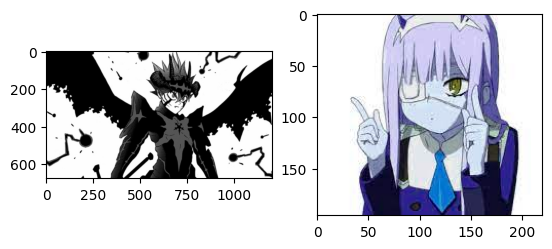

In [11]:
# import image
image_one_to_remove_bg = cv2.imread("image_to_remove_background.jpg")
image_two_to_remove_bg = cv2.imread("darling.jpeg")

image_one_to_remove_bg_as_np_array = np.array(image_one_to_remove_bg)
image_two_to_remove_bg_as_np_array = np.array(image_two_to_remove_bg)

plt.subplot(1, 2, 1)
plt.imshow(image_one_to_remove_bg_as_np_array)
plt.subplot(1, 2, 2)
plt.imshow(image_two_to_remove_bg_as_np_array)


### Declaration of functions to remove background

In [12]:
def convert_to_grayscale(np_image: np.array):
    """convert image to grayscale with numpy
    :param np_image: np.array
    :rtype: np.array
    """
    image_in_gray_scale = np.average(np_image[:, :, :3], axis=2)
    return image_in_gray_scale

def convert_to_grayscale_with_opencv(image):
    """convert image to grayscale with OpenCV
    :param image: cv2.MatLike
    :rtype: cv2.MatLike
    """
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def get_mask_with_opencv(image_in_gray_scale):
    """make mask of an image with opencv
    :param: image_in_gray_scale: cv2.MatLike
    :rtype: NDArray[uint8]
    """
    mask_of_image = cv2.threshold(image_in_gray_scale, 250, 255, cv2.THRESH_BINARY)[1]
    mask_of_image = 255 - mask_of_image

    kernel = np.ones((3, 3), np.uint8)

    mask_of_image = cv2.morphologyEx(mask_of_image, cv2.MORPH_OPEN, kernel)
    mask_of_image = cv2.morphologyEx(mask_of_image, cv2.MORPH_CLOSE, kernel)

    mask_of_image = cv2.GaussianBlur(mask_of_image, (0, 0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)
    mask_of_image = (2 * (mask_of_image.astype(np.float32)) -255.0).clip(0, 255).astype(np.uint8)

    return mask_of_image

def remove_bg(image, mask):
    """remove background of image with opencv
    :param image: cv2.MatLike
    :param mask: NDArray[uint8]
    :rtype: cv2.MatLike
    """
    image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
    image[:, :, 3] = mask

    return image
    

### Convert images to grayscale

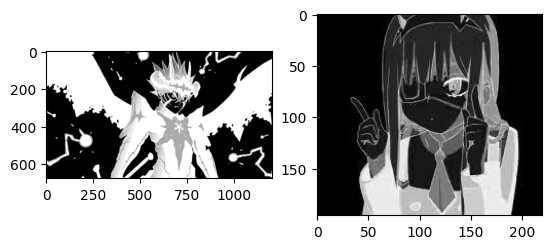

In [13]:
image_one_to_remove_bg_as_np_array_grayscale = convert_to_grayscale_with_opencv(image_one_to_remove_bg_as_np_array)
image_two_to_remove_bg_as_np_array_grayscale = convert_to_grayscale_with_opencv(image_two_to_remove_bg_as_np_array)

plt.subplot(1, 2, 1)
plt.imshow(image_one_to_remove_bg_as_np_array_grayscale, cmap="gray_r")
plt.subplot(1, 2, 2)
plt.imshow(image_two_to_remove_bg_as_np_array_grayscale, cmap="gray_r")


### Create a mask of images

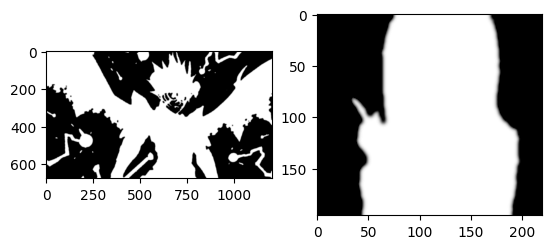

In [14]:
mask_image_one = get_mask_with_opencv(image_one_to_remove_bg_as_np_array_grayscale)
mask_image_two = get_mask_with_opencv(image_two_to_remove_bg_as_np_array_grayscale)

plt.subplot(1, 2, 1)
plt.imshow(mask_image_one, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(mask_image_two, cmap="gray")

### Remove background images

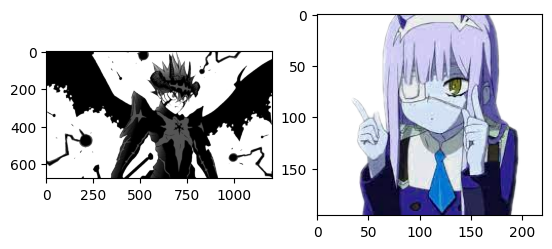

In [15]:
image_without_one_background = remove_bg(image_one_to_remove_bg.copy(), mask_image_one)
image_without_two_background = remove_bg(image_two_to_remove_bg.copy(), mask_image_two)

plt.subplot(1, 2, 1)
plt.imshow(image_without_one_background, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(image_without_two_background, cmap="gray")

### Saving images

In [19]:
root_folder = os.path.abspath(
  os.path.dirname(".")
)

temp_folder = os.path.join(
  root_folder, "temp"
)

if not os.path.exists(temp_folder):
  os.makedirs(temp_folder, exist_ok=True)

path_to_image_one = os.path.join(temp_folder, 'image_one.png')
path_to_image_two = os.path.join(temp_folder, 'image_two.png')
cv2.imwrite(path_to_image_one, image_without_one_background)
cv2.imwrite(path_to_image_two, image_without_two_background)

print(f"Image One has exported in {path_to_image_one}")
print(f"Image Two has exported in {path_to_image_two}")

Image One has exported in d:\projects\python\trabalho-de-cg\temp\image_one.png
Image Two has exported in d:\projects\python\trabalho-de-cg\temp\image_two.png
